In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_dir = "/content/gdrive/My Drive/tomato/train"
valid_dir = "/content/gdrive/My Drive/tomato/val"

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(128, 128, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [7]:
import tensorflow as tf

IMG_SIZE = (128, 128)
BATCH_SIZE = 128
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    seed = 123,
    shuffle = True
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    directory = valid_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
total_classes = len(class_names)
total_classes

10

In [ ]:
checkpoint_path = "/CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')

])

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')

])

In [ ]:
model4 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])

In [ ]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(128, 128,3))
base_model.trainable = False
modelV3 = tf.keras.Sequential([
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
modelV3.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
model3 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 batch_normalization_5 (Batc  (None, None, None, 32)   128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, None, None, 32)    0         
                                                      

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 batch_normalization (BatchN  (None, None, None, 32)   128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, None, None, 32)    0         
                                                        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 conv2d (Conv2D)             (None, None, None, 60)    1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 60)   0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, None, None, 60)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 60)    32460     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 60)   0

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
history = modelV3.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data),
    callbacks = [
        checkpoint_callback,
    ]
)

Epoch 1/30


In [ ]:
history = model4.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data),
    callbacks = [
        checkpoint_callback,
    ]
)

Epoch 1/30
79/79 [==============================] - 506s 3s/step - loss: 1.5315 - accuracy: 0.5057 - val_loss: 4.0373 - val_accuracy: 0.2040
Epoch 2/30
79/79 [==============================] - 73s 927ms/step - loss: 0.9517 - accuracy: 0.6768 - val_loss: 5.1166 - val_accuracy: 0.1930
Epoch 3/30
79/79 [==============================] - 63s 799ms/step - loss: 0.7558 - accuracy: 0.7442 - val_loss: 2.5325 - val_accuracy: 0.4160
Epoch 4/30
79/79 [==============================] - 58s 729ms/step - loss: 0.6111 - accuracy: 0.7960 - val_loss: 2.3849 - val_accuracy: 0.4770
Epoch 5/30
79/79 [==============================] - 47s 586ms/step - loss: 0.5486 - accuracy: 0.8144 - val_loss: 2.1361 - val_accuracy: 0.4860
Epoch 6/30
79/79 [==============================] - 48s 599ms/step - loss: 0.4946 - accuracy: 0.8304 - val_loss: 8.5066 - val_accuracy: 0.1580
Epoch 7/30
79/79 [==============================] - 47s 595ms/step - loss: 0.4486 - accuracy: 0.8489 - val_loss: 0.8641 - val_accuracy: 0.7140
E

In [3]:
model4.save('/content/gdrive/My Drive/SavedModels/TomatoRes4.h5')

NameError: ignored

In [ ]:
model4.save('/content/gdrive/My Drive/TomatoRes4.h5')

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/My Drive/TomatoRes4.h5')

In [ ]:
scores = model.evaluate(valid_data)

In [8]:
scores

[3.5238709449768066, 0.6359999775886536]

In [ ]:
import numpy as np
predictions = model4.predict(valid_data)
predictions = np.argmax(predictions, axis=-1)
predictions.shape

8/8 [==============================] - 0s 27ms/step


(1000,)

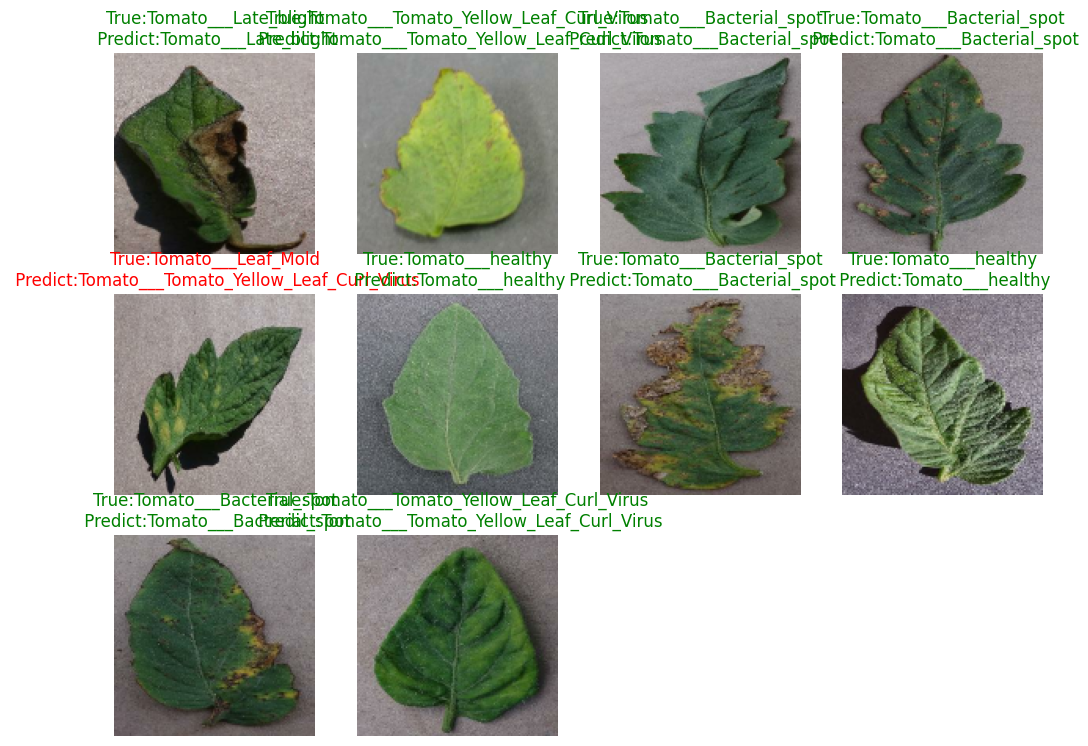

In [ ]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in valid_data.take(1):
    for i in range(0,10):
        plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        true_class = class_names[np.argmax(label_batch[i])]
        predict_class = class_names[predictions[i]]
        title = f"""True:{true_class}\n Predict:{predict_class}"""
        plt.title(title, color='g' if true_class==predict_class else 'r')
        plt.axis("off")

In [ ]:
epochs = 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Accuracy')

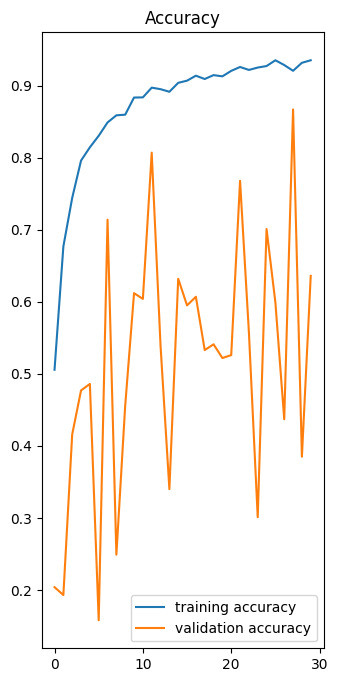

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='training accuracy')
plt.plot(range(epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

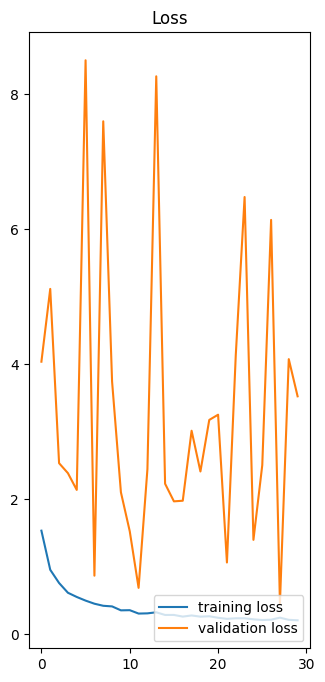

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label='training loss')
plt.plot(range(epochs),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title("Loss")